In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_excel("RQAS2017.xlsx")
df["Parametro"].value_counts()

Nitrogênio-Nitrito                         30
Temperatura da Água                        30
Oxigênio Dissolvido                        30
pH                                         30
Condutividade                              30
Zinco Total                                30
Cloreto Total                              30
Coliformes Termotolerantes                 30
Manganês Total                             30
Mercúrio Total                             30
Crômio Total                               30
Nitrogênio Amoniacal                       30
Fósforo Total                              30
Nitrogênio Kjeldahl                        30
Chumbo Total                               30
Fenóis Totais                              30
DBO (5, 20)                                30
Nitrogênio-Nitrato                         30
Cádmio Total                               30
Chuvas nas últimas 24h                     30
Níquel Total                               30
Subst. Tensoat. reagem c/ Azul Met

In [4]:
def create_df(data_entrada, serie):
    new_data = pd.DataFrame()
    new_data[serie] = pd.to_numeric(data_entrada["Valor"].str.replace(',','.'), downcast="float")
    new_data = new_data.set_index(data_entrada["Data Coleta"])
    return(new_data)

In [6]:
df[df["Parametro"]=='pH']['Valor']

0     7,00000000
1     6,90000000
2     7,20000000
3     7,20000000
4     7,20000000
5     7,10000000
6     7,00000000
7     7,00000000
8     7,10000000
9     7,10000000
10    7,20000000
11    7,10000000
12    7,00000000
13    6,90000000
14    7,20000000
15    6,80000000
16    7,10000000
17    7,00000000
18    7,00000000
19    7,10000000
20    7,20000000
21    7,20000000
22    7,30000000
23    7,00000000
24    6,90000000
25    7,00000000
26    7,30000000
27    7,30000000
28    7,20000000
29    7,20000000
Name: Valor, dtype: object

In [8]:
data_ = pd.DataFrame()
#Escherichia coli** -> Coliformes Termotolerantes
w_coli = 0.15
data_coli = df[df["Parametro"]=='Coliformes Termotolerantes']
#pH
w_pH = 0.12
data_pH = df[df["Parametro"]=='pH']
#DBO (5, 20)
w_DBO = 0.10
data_DBO = df[df["Parametro"]=='DBO (5, 20)']
#Oxigênio Dissolvido
w_OD = 0.17
data_OD = df[df["Parametro"]=='Oxigênio Dissolvido']
#Temperatura da Água
w_temp = 0.10
data_temp = df[df["Parametro"]=='Temperatura da Água']
#Nitrogênio Total
w_nitro = 0.10
data_chumbo = df[df["Parametro"]=='Chumbo Total']
#Fósforo Total
w_fosf = 0.10
data_fosf = df[df["Parametro"]=='Fósforo Total']
#Turbidez
w_turb = 0.08
data_turb = df[df["Parametro"]=='Turbidez']
#Sólido Dissolvido Total -> Resíduo Total
w_res = 0.08
data_res = df[df["Parametro"]=='Sólido Dissolvido Total']
#---------------------------------------------------------------------------------------
data_ = pd.merge(create_df(data_DBO, "DBO"),create_df(data_chumbo, "Nitrogenio"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_coli, "Coliformes"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_pH, "pH"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_OD, "OD"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_temp, "Temperatura"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_fosf, "Fosforo"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_turb, "Turbidez"),on='Data Coleta')
data_ = pd.merge(data_,create_df(data_res, "Residuos"),on='Data Coleta')

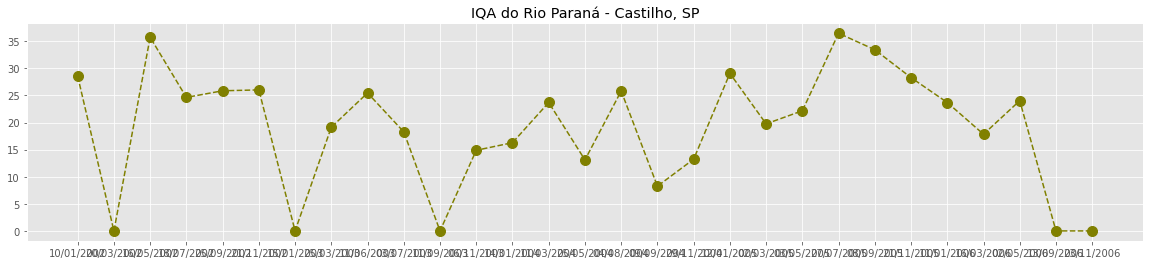

In [9]:
def calcula_IQA(d):
    q = data_.loc[d]
    w = [w_DBO, w_nitro, w_coli, w_pH, w_OD, w_temp, w_fosf, w_turb, w_res]
    IQA = 1
    for e in range(0, len(w)):
        IQA *= q[e]**w[e]
    return IQA

IQA_list = []
for e in data_.index:
    IQA_list.append(calcula_IQA(e))
    
plt.style.use('ggplot')
plt.figure(figsize=(20,4))
plt.plot(data_.index, IQA_list, '--o', color='olive', markersize=10)
plt.grid(True)
plt.title("IQA do Rio Paraná - Castilho, SP")
plt.show()

In [68]:
def to_float(serie):
    li=[]
    for e in serie:
        li.append(float(e.replace(',', '.')))
    return li

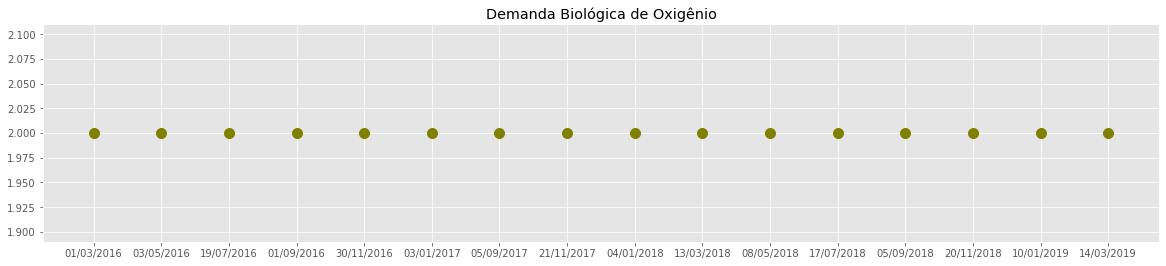

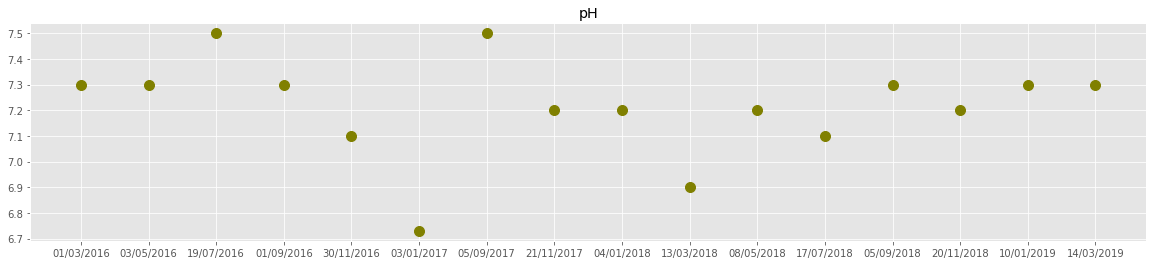

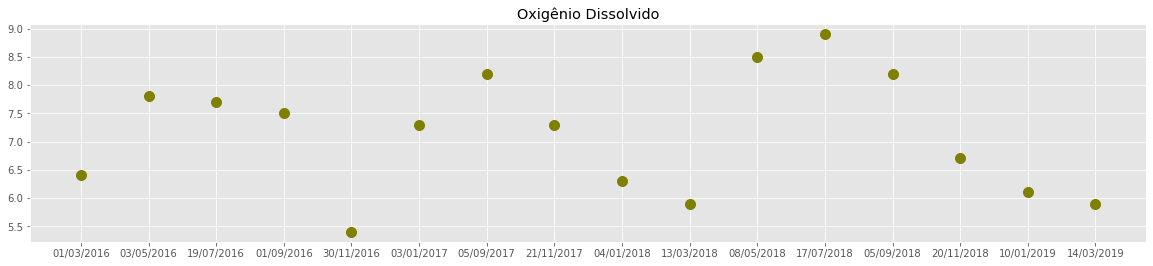

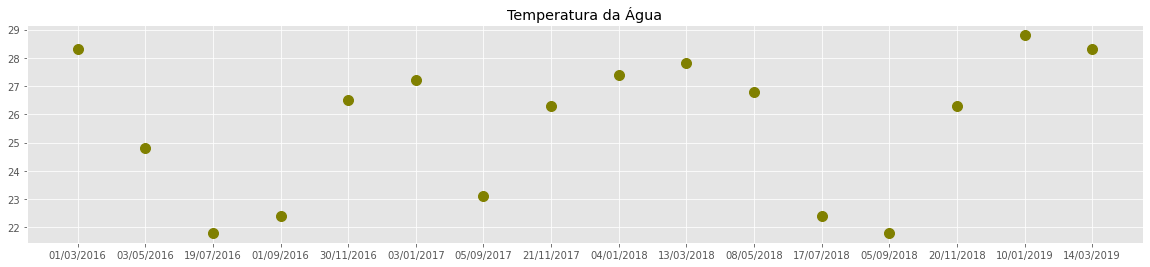

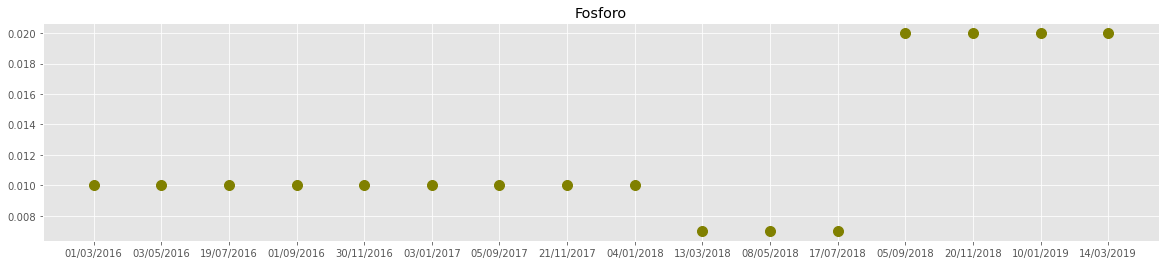

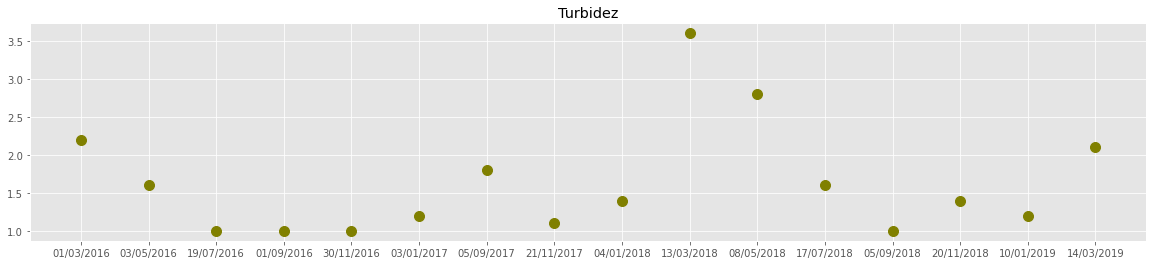

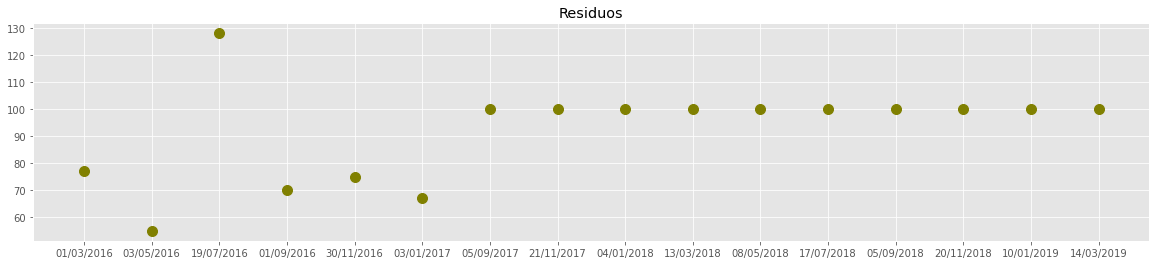

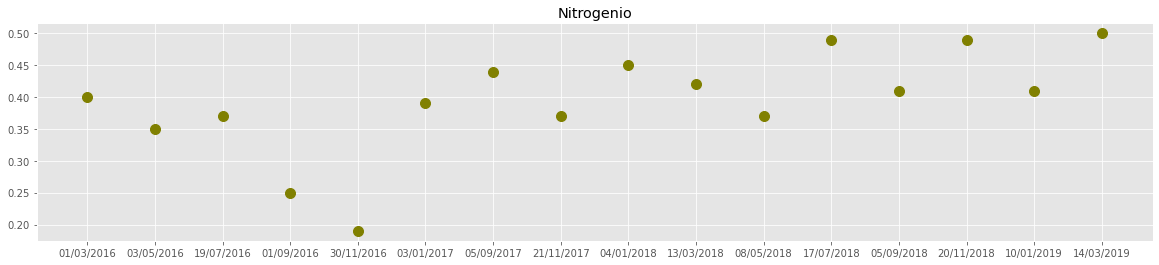

In [93]:
plt.figure(figsize=(20,4))
plt.plot(data_.index, data_['DBO'], 'o', color='olive', markersize=10)
plt.grid(True)
plt.title("Demanda Biológica de Oxigênio")
plt.show()
plt.figure(figsize=(20,4))
plt.plot(data_.index, data_['pH'], 'o', color='olive', markersize=10)
plt.grid(True)
plt.title("pH")
plt.show()
plt.figure(figsize=(20,4))
plt.plot(data_.index, data_['OD'], 'o', color='olive', markersize=10)
plt.grid(True)
plt.title("Oxigênio Dissolvido")
plt.show()
plt.figure(figsize=(20,4))
plt.plot(data_.index, data_['Temperatura'], 'o', color='olive', markersize=10)
plt.grid(True)
plt.title("Temperatura da Água")
plt.show()
plt.figure(figsize=(20,4))
plt.plot(data_.index, data_['Fosforo'], 'o', color='olive', markersize=10)
plt.grid(True)
plt.title("Fosforo")
plt.show()
plt.figure(figsize=(20,4))
plt.plot(data_.index, data_['Turbidez'], 'o', color='olive', markersize=10)
plt.grid(True)
plt.title("Turbidez")
plt.show()
plt.figure(figsize=(20,4))
plt.plot(data_.index, data_['Residuos'], 'o', color='olive', markersize=10)
plt.grid(True)
plt.title("Residuos")
plt.show()
plt.figure(figsize=(20,4))
plt.plot(data_.index, data_['Nitrogenio'], 'o', color='olive', markersize=10)
plt.grid(True)
plt.title("Nitrogenio")
plt.show()

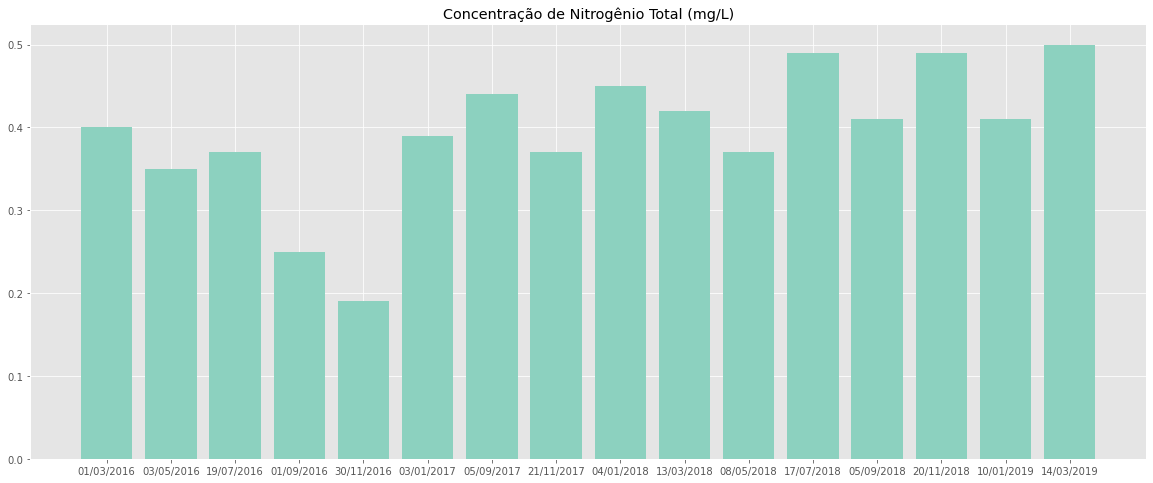

In [160]:
plt.figure(figsize=(20,8))
plt.bar(data_.index, data_['Nitrogenio'], color="#8cd1bf")
plt.title('Concentração de Nitrogênio Total (mg/L)')
plt.savefig("Nitrogenio2.png")
plt.show()